In [1]:
import pandas as pd
import skimage
import matplotlib.pyplot as plt
import numpy as np
import easyocr

reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory


from IPython.display import Image, display

ANNOTATIONS_FILE = "annotations.pkl"
IMAGE_PREFIX = "../data/train/images/"

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
annotations = pd.read_pickle(ANNOTATIONS_FILE)
annotations = annotations[annotations['chart-type'] == 'vertical_bar']
annotations.head()

,source,chart-type,plot-bb,text,axes,data-series,image
1,generated,vertical_bar,"{'height': 164, 'width': 393, 'x0': 68, 'y0': 37}","[{'id': 0, 'polygon': {'x0': 109, 'x1': 355, '...","{'x-axis': {'ticks': [{'id': 11, 'tick_pt': {'...","[{'x': 'Jordan', 'y': 88.35159235668789}, {'x'...",75c0449f6917.jpg
3,generated,vertical_bar,"{'height': 165, 'width': 396, 'x0': 89, 'y0': 60}","[{'id': 0, 'polygon': {'x0': 71, 'x1': 465, 'x...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'...","[{'x': 'Cuba', 'y': 75695.38632268383}, {'x': ...",58595c30beab.jpg
6,generated,vertical_bar,"{'height': 103, 'width': 408, 'x0': 52, 'y0': 65}","[{'id': 0, 'polygon': {'x0': 49, 'x1': 417, 'x...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'...","[{'x': 'Jamaica', 'y': 36.43411033235605}, {'x...",5022600d52d7.jpg
10,generated,vertical_bar,"{'height': 210, 'width': 427, 'x0': 50, 'y0': 36}","[{'id': 0, 'polygon': {'x0': 28, 'x1': 42, 'x2...","{'x-axis': {'ticks': [{'id': 8, 'tick_pt': {'x...","[{'x': '1', 'y': 62.45402663284719}, {'x': '2'...",32176a89b822.jpg
14,generated,vertical_bar,"{'height': 220, 'width': 427, 'x0': 64, 'y0': 38}","[{'id': 0, 'polygon': {'x0': 74, 'x1': 473, 'x...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'...","[{'x': 'Harney', 'y': 75.91000641635438}, {'x'...",3d895e511690.jpg


[]
['Labor index during the year 1961', '300,0', '250.0', '200.0', '1', '150.0', '1', '100.0', '50,0', '0.0', 'Country', 'North Korea', 'Northeasi Asia', 'Northern .', 'Norway', 'Oman', 'Pacific', 'Pakustan', 'Panama', 'Papua New.', 'Ocear']


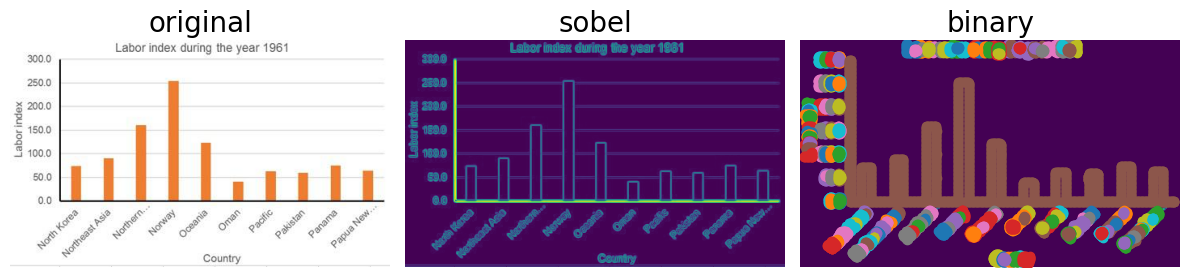

[]
['Estmates 1950', '2020  Tetal populationby broadage group both sexes', 'combined (thousands) - Fopulation under age 15 for the year 1956', 'I2axax', 'IOQA', '88OQ0', 'L', 'Gpocoqo', '4QODco', '2ALQ', '448', 'COuby', 'Trini Lul zid -', 'Unite Arab  _', 'Tunor', 'Tonga', '"Tunisla', 'Turkey', 'Uxuta', 'Ukraite', 'Turkuk']


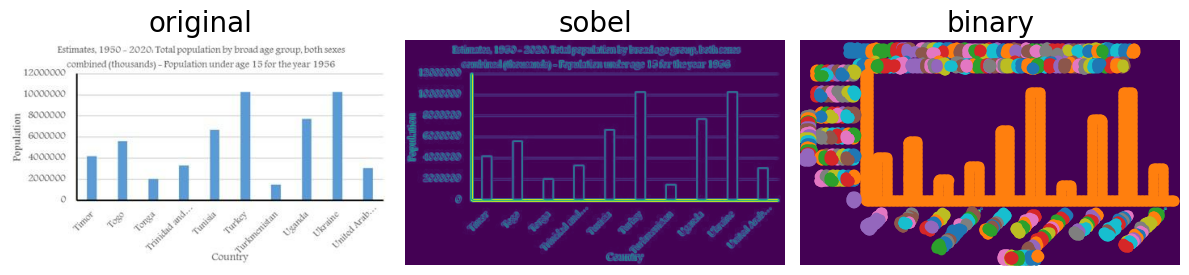

In [3]:
from skimage.morphology import skeletonize
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage import measure

def draw_info(row):
    image = skimage.io.imread(IMAGE_PREFIX + row['image'])
    # display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                            sharex=True, sharey=True)

    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title('original', fontsize=20)

    ax[1].imshow(sobel(rgb2gray(image)))
    ax[1].axis('off')
    ax[1].set_title('sobel', fontsize=20)

    gray = rgb2gray(image)
     # Threshold the image to create a binary mask
    thresh = skimage.filters.threshold_otsu(gray)
    binary = gray > thresh

    # Label connected regions in the binary mask
    labels = measure.label(binary)
    # Find contours of labeled regions
    contours = measure.find_contours(labels, 0.5)
    # Loop over the contours and find the minimum bounding rectangle for each
    rectangles = []
    for contour in contours:
        # Ignore contours with less than four points (not a rectangle)
        if  len(contour) < 10:
            continue
            
        plt.scatter(contour[:,1], contour[:,0])
        

    print(rectangles)

    ax[2].imshow(sobel(binary))
    ax[2].axis('off')
    ax[2].set_title('binary', fontsize=20)

    print([text for coord, text, confidence in reader.readtext(image)])
    # print([text for coord, text, confidence in reader.readtext(sobel((image)).astype(np.float32))])

    fig.tight_layout()
    plt.show()
    

for _, row in annotations.sample(2, random_state=123).iterrows():
    draw_info(row)

# lines 22
[]
['Labor index during the year 1961', '300,0', '250.0', '200.0', '1', '150.0', '1', '100.0', '50,0', '0.0', 'Country', 'North Korea', 'Northeasi Asia', 'Northern .', 'Norway', 'Oman', 'Pacific', 'Pakustan', 'Panama', 'Papua New.', 'Ocear']


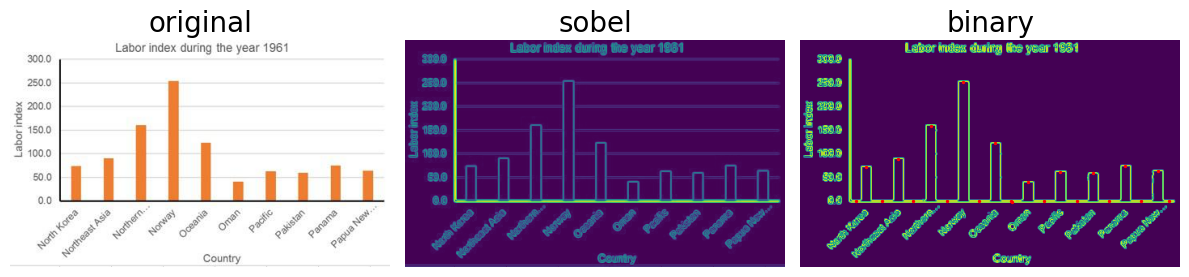

# lines 22
[]
['Estmates 1950', '2020  Tetal populationby broadage group both sexes', 'combined (thousands) - Fopulation under age 15 for the year 1956', 'I2axax', 'IOQA', '88OQ0', 'L', 'Gpocoqo', '4QODco', '2ALQ', '448', 'COuby', 'Trini Lul zid -', 'Unite Arab  _', 'Tunor', 'Tonga', '"Tunisla', 'Turkey', 'Uxuta', 'Ukraite', 'Turkuk']


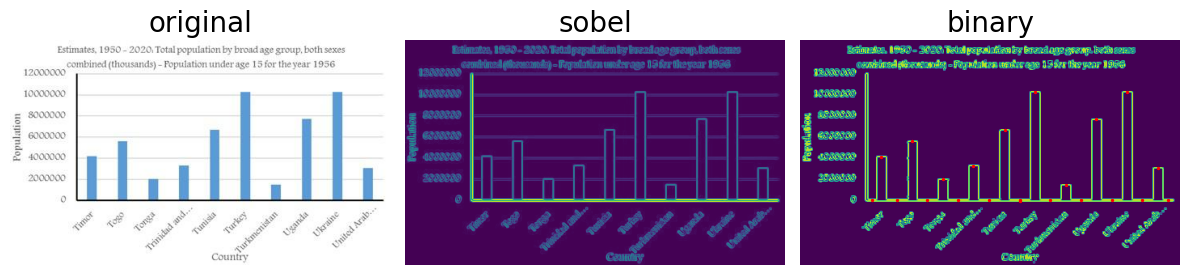

# lines 34
[]
['Air quality Measures', 'the national cnviroumental', 'health', 'tracking network iu 2009', '120', '100', '1', '1', 'COUNTRY', 'Stafford', 'Seward', 'Shawuce', 'Smith', 'Thomas', 'Wallace', 'Wichita', 'Sheridan', 'Sherman', 'Stanton', 'Stevens', 'Sumner', 'Trego', 'labaunsce', 'Tashington']


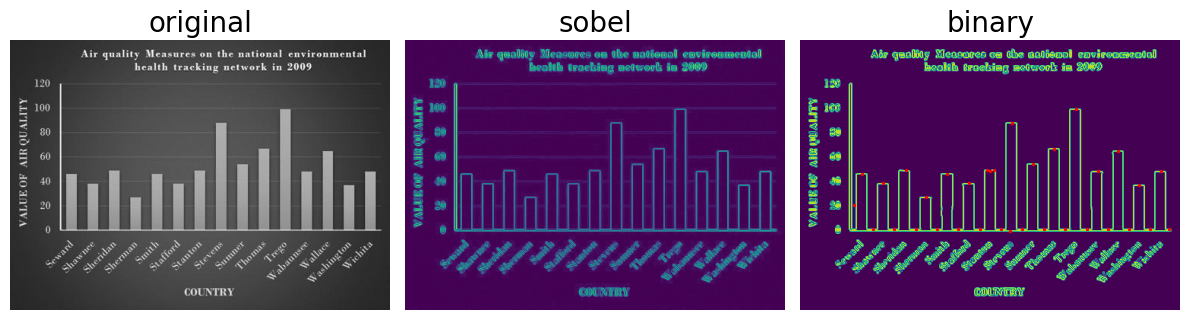

# lines 22
[]
['Urban population (%) long-run with 2050', 'projections (OWID) in the year 1978', 'H', 'L', '60', 'Country', '{Virgin "', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'cdle.', '~Uruguay', 'kistan', 'Tuvale', 'Emifat', 'Upper-mic', '~Uzbek', "United States '", 'United /']


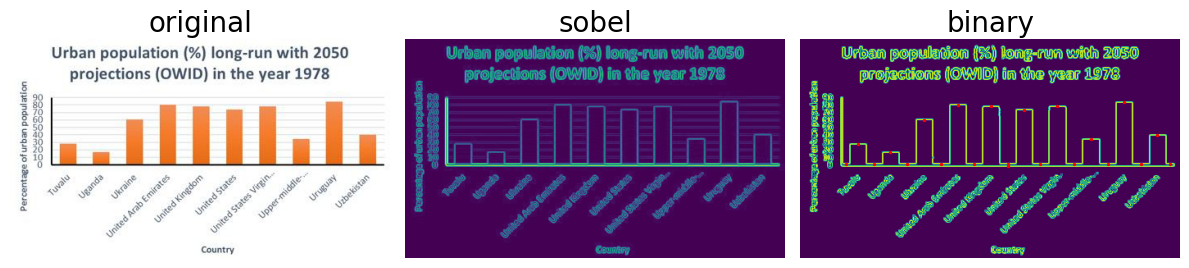

# lines 24
[]
['Sex ratio by age (40 vear olds) (UNWPP;', '2017) in the Year 2000', '140', '170', '100', '', '42', 'Country', 'loped.', 'developed.', 'developed', '~Latvia', 'Lebanon', 'Lesotho', 'Tregions', 'Liberia', 'Lbva', 'Lithuanla', 'devel', 'J', '~Least (', '"Less €', '"Less']


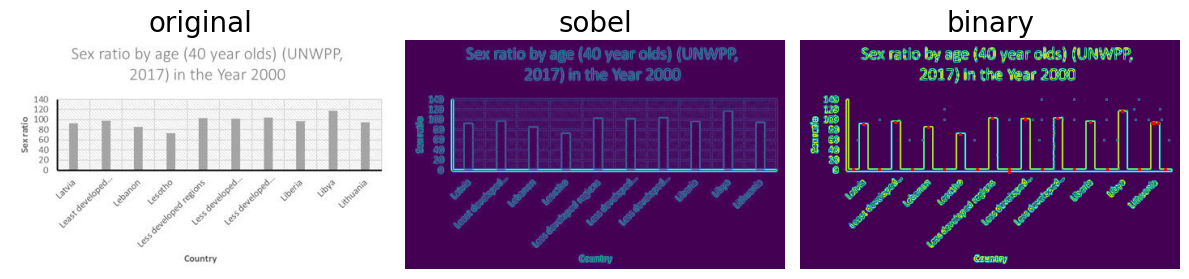

# lines 46
[]
['80', '70', '60', 'L', '50', '30', '1', '20', '2000', '2001', '2002', '2003']


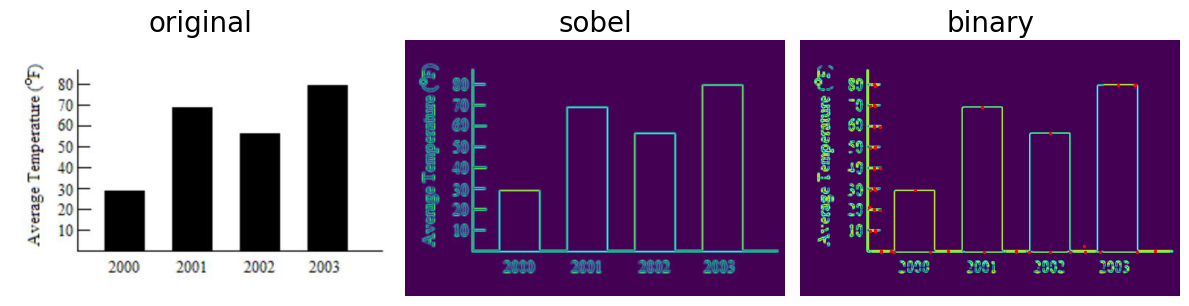

# lines 39
[]
['DJeaths', 'Aalaria', 'Sex: Rath', 'Age:', '70 - Feafs (Numbet)', 'Sub- Saharal AInca', '444713)', '45000', '4qooo', '35000', '30000', '25000', '1', '2000O', '1S000', '10000', '50D0', '2005 2006 2007 2008 2009 2010,2011 2012 2013 2014.2015 2016 2017 2018 2019', 'YEARS']


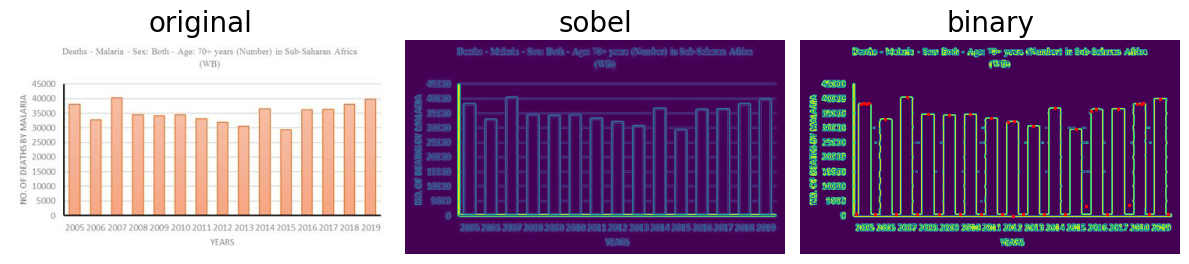

# lines 78
[]
['CO2 Emisions by burning oilin Oceania', '2S00', '8', '20000', 'I5000', '8', 'JOCOO', '1', '8 2 222222232228228883', 'Year', 'SuOO']


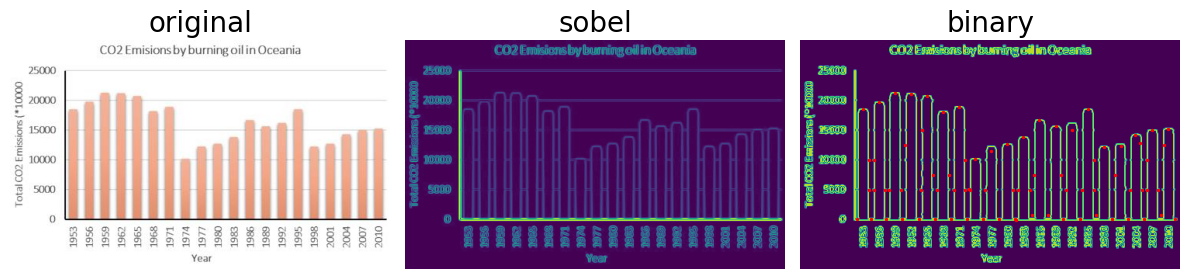

# lines 32
[]
['Sex ratio by age (20 year olds) (UNWPP , 2017) in Colombia', '103.4', '103.2', '102.8', '102.6', '102 4', '102.2', '101.8', '101.', '2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015', 'Years']


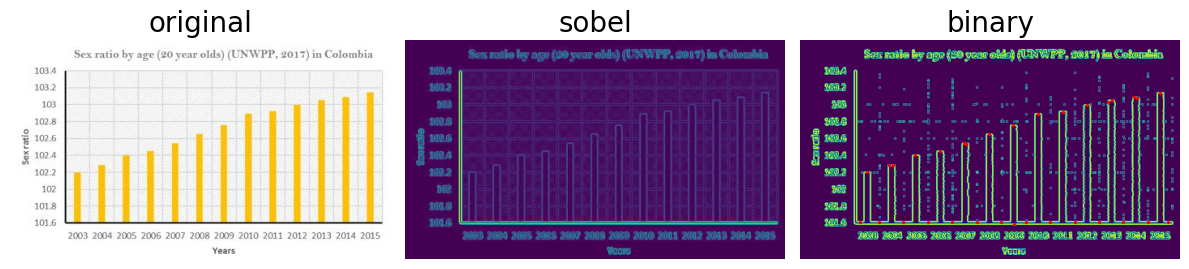

# lines 2
[]
['SEX RATIO BY AGE (70 YEAR OLDS)', '(UNWPP, 2017) IN THE YEAR 1980', '120', '100', '2', '3', '00"', 'COUNTRY', "'and -", '~Bhutan', 'Bolivia', 'Brazi', 'Brunei', 'Jwana', '~Bulgaria', '1 Faso', 'Bosnia :', 'Burkina =']


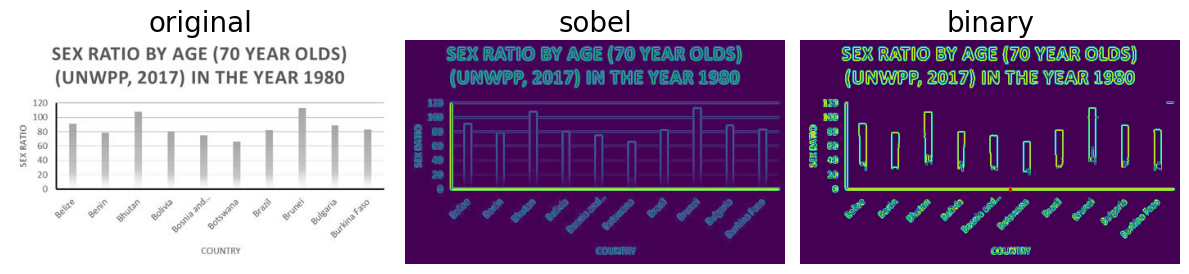

In [5]:
from skimage.morphology import skeletonize
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage import measure

def get_horizontal_lines(contour):
    prev_x, prev_y = None, None
    lines = []
    current_line = []
    for x, y in contour:
        if prev_x is not None:
            dx = abs(prev_x - x)
            dy = abs(prev_y - y)
            if dx * 1.2 < dy:
                current_line.append([x, y])
            elif len(current_line) > 1:
                lines.append(current_line)
                current_line = []
        prev_x, prev_y = x, y
    return lines


def draw_info(row):
    image = skimage.io.imread(IMAGE_PREFIX + row['image'])
    # display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                            sharex=True, sharey=True)

    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title('original', fontsize=20)

    ax[1].imshow(sobel(rgb2gray(image)))
    ax[1].axis('off')
    ax[1].set_title('sobel', fontsize=20)

    gray = rgb2gray(image)
     # Threshold the image to create a binary mask
    thresh = skimage.filters.threshold_otsu(gray)
    binary = gray > thresh

    # Label connected regions in the binary mask
    labels = measure.label(binary)
    # Find contours of labeled regions
    contours = measure.find_contours(labels, 0.5)
    # Loop over the contours and find the minimum bounding rectangle for each
    rectangles = []
    for contour in contours:
        # Ignore contours with less than four points (not a rectangle)
        if  len(contour) < 2:
            continue

        x_min, y_min = contour.min(axis=0)
        x_max, y_max = contour.max(axis=0)

        width = x_max - x_min
        height = y_max - y_min

        image_width, image_height, _ = image.shape
        if width > image_width*0.2 and height > image_height*0.2:

            lines = get_horizontal_lines(contour)
            print("# lines", len(lines))
            all_lines = np.vstack(lines)
            #plt.scatter(all_lines[:,1], all_lines[:,0], s=1)

            centers = np.array([np.mean(line, axis=0) for line in lines])
            plt.scatter(centers[:,1], centers[:,0], s=2, c='r')
            # for line in lines:
            #     line = np.array(line)
            #     plt.scatter(line[:,1], line[:,0], s=1)
        

    print(rectangles)

    ax[2].imshow(sobel(binary))
    ax[2].axis('off')
    ax[2].set_title('binary', fontsize=20)

    print([text for coord, text, confidence in reader.readtext(image)])
    # print([text for coord, text, confidence in reader.readtext(sobel((image)).astype(np.float32))])

    fig.tight_layout()
    plt.show()
    

for _, row in annotations.sample(10, random_state=123).iterrows():
    draw_info(row)